In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings;
warnings.filterwarnings('ignore');

## K-means clustering of the MNIST dataset

This project applies the k-means clustering algorithm to cluster written digits.

The [MNIST](http://yann.lecun.com/exdb/mnist/) dataset is a large database of handwritten digits. We will analyse a subset of this database with digit images reduced to 8x8 grayscaled valued pixels.  

It is a very well known dataset in the machine learing community and can be loaded directly from Scikit-learn:

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In `digits`, `data` contains the pixel feature vectors and `target` contains the labels:

In [3]:
print(digits.data.shape)
print(digits.data)
print(digits.target)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


The following code shows a random datapoint:

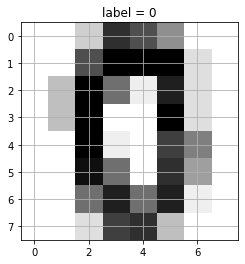

In [4]:
import random

plt.grid(b=None)
idx = random.randint(0,len(digits.data)-1)
plt.imshow(digits.data[idx].reshape(8,8),cmap=plt.cm.gray_r)
plt.title("label = %i"%digits.target[idx])
plt.show()

The `KMeans` function in Scikit-learn has the following parameters:

In [5]:
from sklearn.cluster import KMeans

help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

Notice that the k-means++ initialization is the default in Scikit-learn KMeans.

Also notice hyperparameter `n_init` that sets the number of time the k-means algorithm will be run with different centroid seeds, with the final best result selected based on the inertia metric.

*Cluster the data into 10 groups with just one random cluster center initialization. Set `random_state` equal to zero:* 

In [25]:
#Start code here
kmeans = KMeans(n_clusters = 10, random_state=0, init='random', n_init=1).fit(digits.data)
clusters = kmeans.predict(digits.data)
#End code here

print(kmeans.cluster_centers_.shape)
print(clusters)

(10, 64)
[7 1 1 ... 1 8 8]


*What is the inertia for the obtained clusters?*

In [7]:
#Start code here

inertia = kmeans.inertia_
print(inertia)

#End code here

1165142.0046186212


The following code plots the 10 cluster centers:

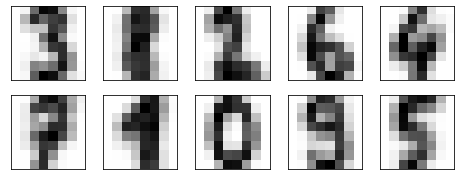

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
for axi, center in zip(ax.flat, kmeans.cluster_centers_):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center.reshape(8, 8), cmap=plt.cm.binary)

Now we have each datapoint (written digit) assiged to one of these cluster centers.

*Print the labels for all the datapoints in the first cluster:*

In [13]:
#Start code here

labels = kmeans.labels_
labels_1 = labels[np.where(kmeans.labels_ == 0)]
print(labels_1)
## ??? 
#End code here

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


The true labels are known (in contrast to real unsupervised learning where the labels are unknown) and can be used to evaluate the k-means clustering result. 

For this, we assign the mode of the datapoint labels in a cluster to all the datapoints in that cluster.

*Use the Python `mode()` function to compute, for each cluster, the mode of the labels of the datapoints in that cluster:*

In [26]:
from scipy.stats import mode

#Start code here

for i in range(0,10):
    print(mode(clusters[np.where(kmeans.labels_ == i)]))
   

#End code here

ModeResult(mode=array([0], dtype=int32), count=array([176]))
ModeResult(mode=array([1], dtype=int32), count=array([224]))
ModeResult(mode=array([2], dtype=int32), count=array([175]))
ModeResult(mode=array([3], dtype=int32), count=array([182]))
ModeResult(mode=array([4], dtype=int32), count=array([165]))
ModeResult(mode=array([5], dtype=int32), count=array([206]))
ModeResult(mode=array([6], dtype=int32), count=array([93]))
ModeResult(mode=array([7], dtype=int32), count=array([179]))
ModeResult(mode=array([8], dtype=int32), count=array([248]))
ModeResult(mode=array([9], dtype=int32), count=array([149]))


*Does every cluster have a different label mode?*

We can set the label mode as the k-means class prediction for each datapoint in a cluster.

The following code creates a numpy array `cluster_labels` that contains these predictions for each datapoint: 

In [15]:
cluster_labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    cluster_labels[mask] = mode(digits.target[mask])[0]
    
print(cluster_labels)

[0 8 8 ... 8 9 9]


Finally, we compare these predictions with the true labels of the datapoints.

*Compute the accuracy of the k-means class predictions:*

In [16]:
#Start code here

from sklearn import metrics

score_acc = metrics.accuracy_score(clusters, cluster_labels)

#End code here

print(score_acc)

0.18920422927100725


*Plot the prediction results as a confusion matrix:*

In [113]:
from sklearn.metrics import confusion_matrix

#Start code here

matrix = confusion_matrix(clusters, cluster_labels)
print(matrix)
print(matrix.shape)
#End code here

[[  0   0   0 176   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 224   0]
 [  0   0 175   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 182   0   0   0]
 [  0   0   0   0 165   0   0   0   0   0]
 [  0   0   0   0   0   0   0 206   0   0]
 [  0  93   0   0   0   0   0   0   0   0]
 [179   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 248]
 [  0   0   0   0   0 149   0   0   0   0]]
(10, 10)


*What does this tell you about the following pair of classes?*
- *8 and 1*
- *9 and 5*
- *9 and 8*

*Repeat the k-means clustering with just one random cluster center initialization for 100 different cluster center initializations (run k-means a hundred times). Compute the accuracy for each of the k-means class predictions and store these in the list called `kmeans_accuracies`:*

In [ ]:
kmeans_accuracies = []

#Start code here
for i in range(100):
    kmeans = KMeans(n_clusters = 1, random_state=0, init='random', n_init=1)
    clusters = kmeans.fit(digits.data)

#End code here

*Use the Seaborn `distplot()` function to plot the 100 accuracies in `kmeans_accuracies`:*

In [ ]:
#Start code here
sns.distplot(kmeans_accuracies)
#End code here

*What do you see?*

*Make the same plot for k-means cluster centers initialized with k-means++:* 

In [ ]:
kmeans_accuracies = []

#Start code here

#End code here

*What do you see?*

*Make the same plot for k-means cluster centers initialized with k-means++  and `n_init` equal to 10:*

In [ ]:
kmeans_accuracies = []

#Start code here

#End code here

*What do you see?*

*Estimate the performance (accuracy) of an optimized logistic regression model on unseen external data:*

In [ ]:
#Start code here
#End code here